In [1]:
import sys
import os;os.chdir('../fitlab/')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from pandas import read_excel as read
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import string
# enable plots in the notebook
%matplotlib inline 

In [29]:
conf=load_config('inputs/upol_compass.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 5002

In [ ]:
Data vs Theory

In [30]:
UPOL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

UPOL.columns

Index([      u'Ebeam',          u'F2',           u'N',          u'Q2',
             u'Shift',          u'W2',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT',         u'pT2',
       u'r-residuals',   u'residuals',       u'shift',      u'stat_u',
             u'sys_u',      u'target',         u'thy',       u'value',
                 u'x',           u'y',          u'yh',          u'yp',
                 u'z'],
      dtype='object')

In [35]:
## Set working directory
os.chdir('../') # move dir back one 
current = os.getcwd() # get current dir
print "Moved Working directory back  %s" % current # check current dir


path = current+'/database/sidis/expdata/'
os.chdir(path) # one dir back
# Check 
newDir = os.getcwd() # get current dir
print "Working directory for data %s" % newDir # check current dir

## Grabing list of files
data=os.listdir('./') # list all files in dir
data=[files for files in data if files.endswith('.xlsx') and not files.startswith('~')] # list of COMPASS data
print "Data files retrieved %s" % data

Moved Working directory back  /Users/avp5627/GIT/PSU-PHYS296/Python
Working directory for data /Users/avp5627/GIT/PSU-PHYS296/Python/database/sidis/expdata
Data files retrieved ['1000.xlsx', '1001.xlsx', '1002.xlsx', '1003.xlsx', '1004.xlsx', '1005.xlsx', '1006.xlsx', '1007.xlsx', '2000.xlsx', '2001.xlsx', '2002.xlsx', '2003.xlsx', '2004.xlsx', '5001.xlsx', '5002.xlsx']


In [40]:
## Reading and resructuring data

data5001whole = df(read(data[-2]))

# Calculate mesurment error
data5001whole["delta"] = (data5001whole["stat_u"]**2.0+data5001whole["sys_u"]**2.0)**(1/2.0)

##Binning data
xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4]
Q2Bin=[1,1.7,3,7,16,81]

data5001whole['xClas'] = pd.cut(data5001whole['x'], xBin, labels=map(chr, range(97, 97+len(xBin)-1)))
data5001whole['xBin'] = pd.cut(data5001whole['x'], xBin)

data5001whole['Q2Clas'] = pd.cut(data5001whole['Q2'], Q2Bin, labels=map(chr, range(65, 65+len(Q2Bin)-1)))
data5001whole['Q2Bin'] = pd.cut(data5001whole['Q2'], Q2Bin)

 
print data5001whole.head()

groups=[['a','A'],['a','B'], ['b','A'], ['b','B'], ['c','A'], ['c','B'], ['c','C'], ['d','A'], ['d','B'], ['d','C'], ['e','A'],
        ['e','B'], ['e','C'], ['e','D'], ['f','B'], ['f','C'], ['f','D'], ['g','C'], ['g','D'], ['g','E'], ['h','D'], ['h','E']]
z=data5001whole.z.unique()#groups of z
gridmap=[6,7,12,13,14,15,18,19,20,21,22,24,25,26,27,28,29,32,33,34,35,36] #map of ith subplots on 5x8 grid
shairYax=[6,12,18,24,32] #Subplots with y-axes ticks
shairXax=[15,22,29,32,33,34,35,36] #Subplots with x-axes ticks
Zcolor=["red","green","blue","orange"]
Zmark=["o","o","o","o"]
Zline=[':','-.','--','-']

   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719  0.3126   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175  0.3135   
2    160  0.157  20.0  0.439  0.2  0.360555  0.13  M_Compass  5.0537  0.2711   
3    160  0.157  20.0  0.439  0.2  0.400000  0.16  M_Compass  4.8854  0.2244   
4    160  0.157  20.0  0.439  0.2  0.424264  0.18  M_Compass  4.1757  0.2275   

     ...         col       F2        yp        yh          W2     delta  \
0    ...     compass  0.64392  3.414464 -0.998970  108.268379  0.329795   
1    ...     compass  0.64392  3.414464 -0.914156  108.268379  0.330521   
2    ...     compass  0.64392  3.414464 -0.841657  108.268379  0.291452   
3    ...     compass  0.64392  3.414464 -0.749458  108.268379  0.248476   
4    ...     compass  0.64392  3.414464 -0.696253  108.268379  0.252741   

   xClas         xBin  Q2Clas     Q2Bin  
0      g  (0.1, 0.21]     

In [33]:
## Reading and resructuring data for COMPASS

data5001 = UPOL.query('hadron=="pi+"')

# Calculate measurment error
data5001["delta"] = np.sqrt((data5001["stat_u"]**2.0+data5001["sys_u"]**2.0))
data5001["qT"] = data5001["pT"]/data5001["z"]
data5001["qT2"] = data5001["qT"]**2



##Binning data
xBin=[0.003,0.008,0.013,0.02,0.032,0.055,0.1,0.21,0.4]
Q2Bin=[1,1.7,3,7,16,81]

data5001['xClas'] = pd.cut(data5001['x'], xBin, labels=map(chr, range(97, 97+len(xBin)-1)))
data5001['xBin'] = pd.cut(data5001['x'], xBin)

data5001['Q2Clas'] = pd.cut(data5001['Q2'], Q2Bin, labels=map(chr, range(65, 65+len(Q2Bin)-1)))
data5001['Q2Bin'] = pd.cut(data5001['Q2'], Q2Bin)

print data5001.head()


   Ebeam       F2    N    Q2  Shift          W2     alpha      col hadron  \
0    160  0.64392  1.0  20.0    0.0  108.268379  0.329795  compass    pi+   
1    160  0.64392  1.0  20.0    0.0  108.268379  0.330521  compass    pi+   
2    160  0.64392  1.0  20.0    0.0  108.268379  0.291452  compass    pi+   
3    160  0.64392  1.0  20.0    0.0  108.268379  0.248476  compass    pi+   
4    160  0.64392  1.0  20.0    0.0  108.268379  0.252741  compass    pi+   

         obs    ...           yh        yp    z     delta        qT   qT2  \
0  M_Compass    ...    -0.998970  3.414464  0.2  0.329795  1.500000  2.25   
1  M_Compass    ...    -0.914156  3.414464  0.2  0.330521  1.658312  2.75   
2  M_Compass    ...    -0.841657  3.414464  0.2  0.291452  1.802776  3.25   
3  M_Compass    ...    -0.749458  3.414464  0.2  0.248476  2.000000  4.00   
4  M_Compass    ...    -0.696253  3.414464  0.2  0.252741  2.121320  4.50   

   xClas         xBin  Q2Clas     Q2Bin  
0      g  (0.1, 0.21]       E  (

In [10]:
## Seting perameters
#xbins=a:h;Q2bins=A:E
groups=[['a','A'],['a','B'], ['b','A'], ['b','B'], ['c','A'], ['c','B'], ['c','C'], ['d','A'], ['d','B'], ['d','C'], ['e','A'],
        ['e','B'], ['e','C'], ['e','D'], ['f','B'], ['f','C'], ['f','D'], ['g','C'], ['g','D'], ['g','E'], ['h','D'], ['h','E']]
z=data5001.z.unique()#groups of z
gridmap=[6,7,12,13,14,15,18,19,20,21,22,24,25,26,27,28,29,32,33,34,35,36] #map of ith subplots on 5x8 grid
shairYax=[6,12,18,24,32] #Subplots with y-axes ticks
shairXax=[15,22,29,32,33,34,35,36] #Subplots with x-axes ticks
Zcolor=["red","green","blue","orange"]
Zmark=["o","o","o","o"]
Zline=[':','-.','--','-']

In [6]:
## testing
for group,grid in zip(range(len(groups)),gridmap):#zip merges >= 2 list into one interable set
    print groups[group][0]
    print groups[group][1]
    print grid
    for i in z:
        print i
#for group in range(len(groups)):
#    print groups[group][0]
#    print groups[group][1]

a
A
6
0.2
0.3
0.4
0.6
a
B
7
0.2
0.3
0.4
0.6
b
A
12
0.2
0.3
0.4
0.6
b
B
13
0.2
0.3
0.4
0.6
c
A
14
0.2
0.3
0.4
0.6
c
B
15
0.2
0.3
0.4
0.6
c
C
18
0.2
0.3
0.4
0.6
d
A
19
0.2
0.3
0.4
0.6
d
B
20
0.2
0.3
0.4
0.6
d
C
21
0.2
0.3
0.4
0.6
e
A
22
0.2
0.3
0.4
0.6
e
B
24
0.2
0.3
0.4
0.6
e
C
25
0.2
0.3
0.4
0.6
e
D
26
0.2
0.3
0.4
0.6
f
B
27
0.2
0.3
0.4
0.6
f
C
28
0.2
0.3
0.4
0.6
f
D
29
0.2
0.3
0.4
0.6
g
C
32
0.2
0.3
0.4
0.6
g
D
33
0.2
0.3
0.4
0.6
g
E
34
0.2
0.3
0.4
0.6
h
D
35
0.2
0.3
0.4
0.6
h
E
36
0.2
0.3
0.4
0.6


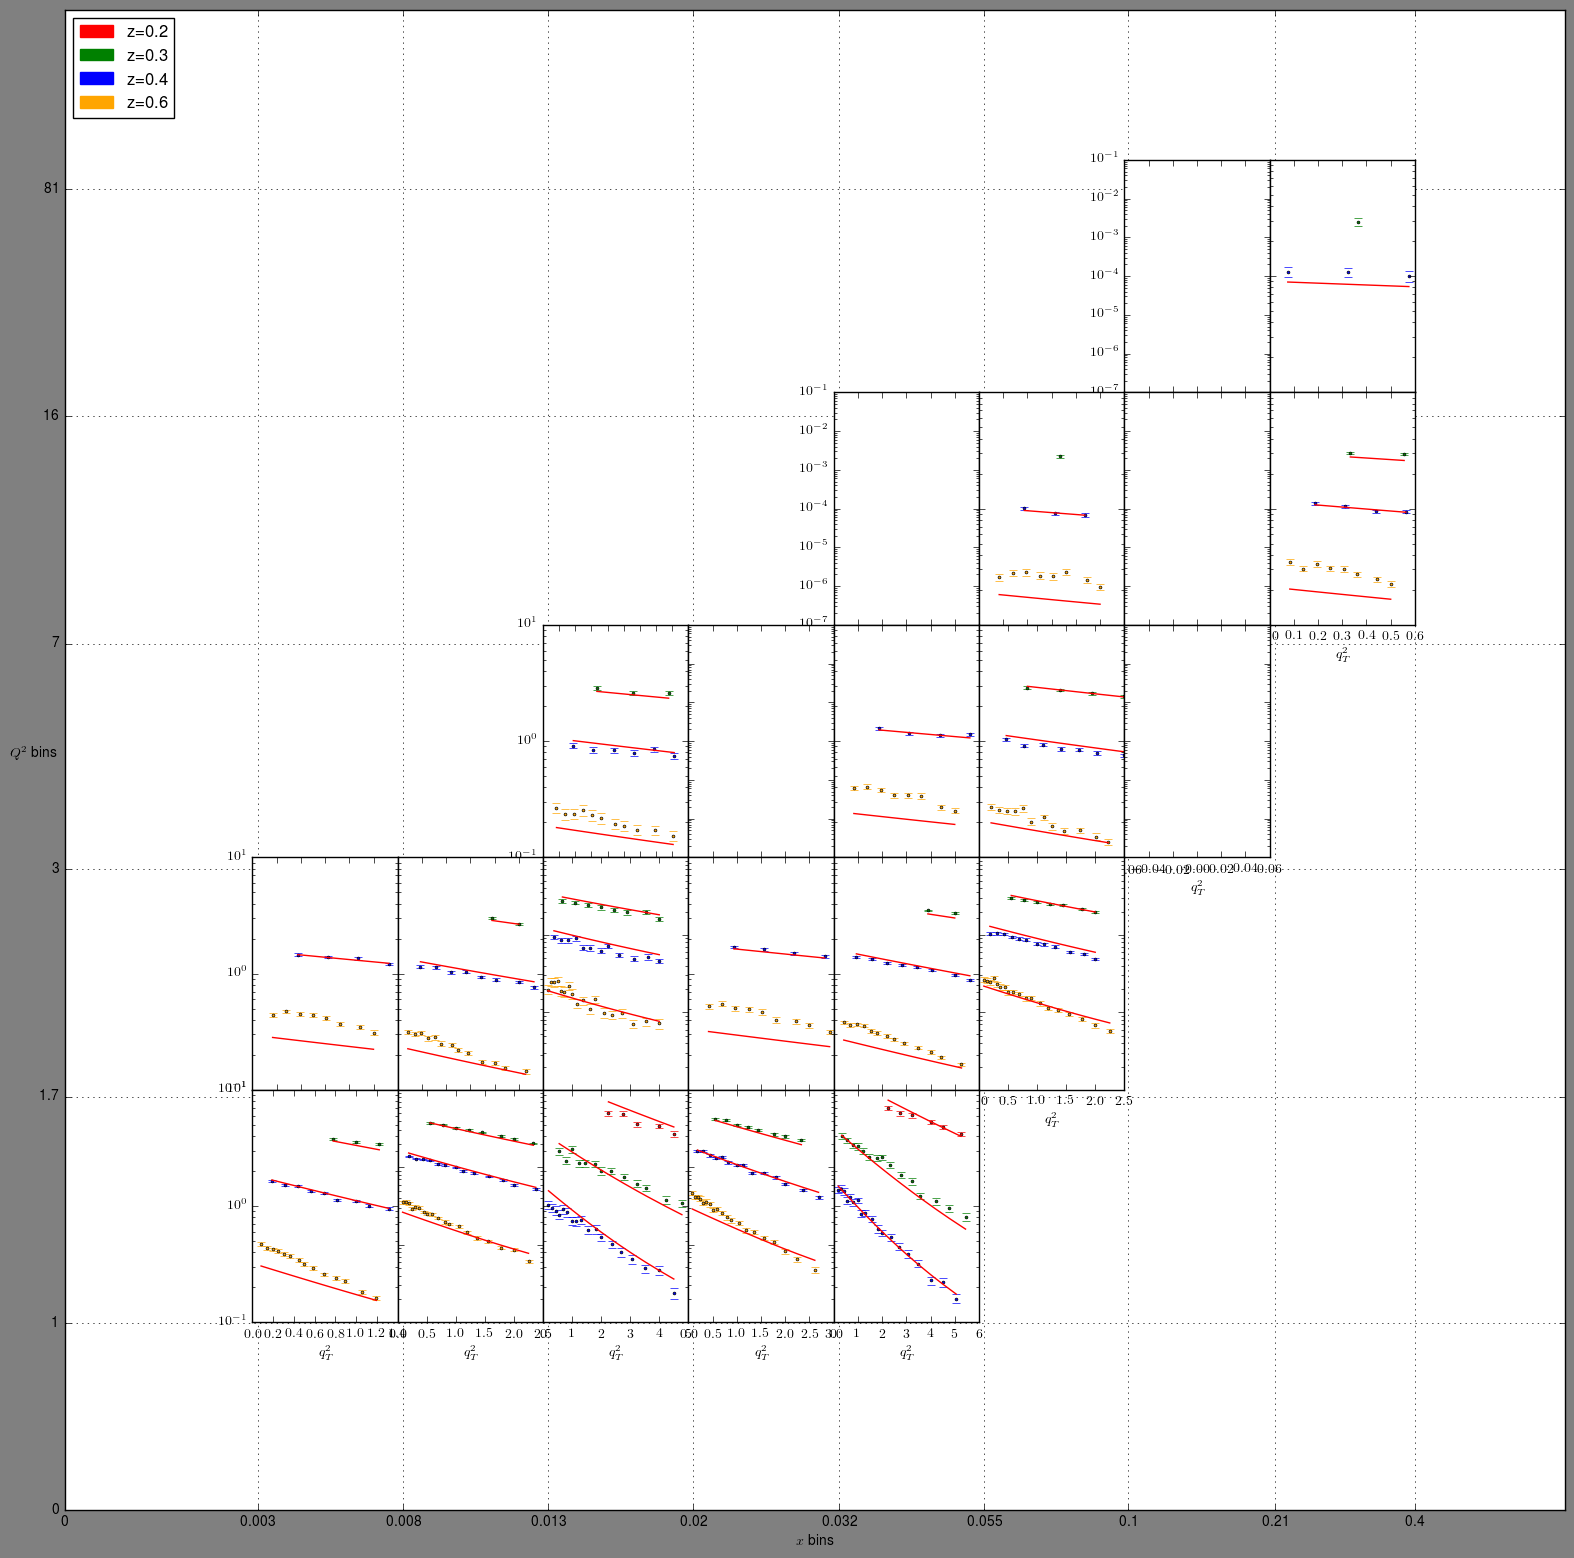

In [27]:
## Ploting
fig=plt.figure(figsize=(15, 15),facecolor="gray") # figsize=wxh in inches

globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) #the axis to put subplot grid in
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) #subplot grid

# Set custom ticks
ax=fig.add_axes([0,0,1,1])
ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805])
ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9])
ax.set_yticklabels([0]+Q2Bin)
ax.set_xticklabels([0]+xBin)

# Set title and axis labels
#ax.title("COMPASS Data")
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
ax.set_xlabel(r"$x$ bins")

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='z=0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='z=0.3')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='z=0.4')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='z=0.6')
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4],loc='upper left')
ax.grid()

for group,grid in zip(range(len(groups)),gridmap):
    data_bin=data5001.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1]))
    k=0 #counter
    for i in z:
        ax = fig.add_subplot(innerGrid[grid])
        ax.set_yscale("log")
        ax.errorbar(data_bin.qT2[data_bin.z==i],data_bin.value[data_bin.z==i],#x,y
                    data_bin.delta[data_bin.z==i],#errorbars
                    color=Zcolor[k],marker=Zmark[k],linestyle=Zline[k],linewidth=0,markersize=2)#line properties
        data_bin_theory = data5001.query('xClas=="%s" and Q2Clas=="%s" and z=="%s"' %(groups[group][0],groups[group][1],i))
        #print data_bin_theory
        ax.plot(data_bin.qT2[data_bin.z==i],data_bin.thy[data_bin.z==i],'r-')
        ax.plot(data_bin_theory['qT2'].values,data_bin_theory['thy'].values,'r-')
        if grid not in shairYax:
            ax.set_yticklabels('')
        if grid not in shairXax:
            ax.set_xticklabels('')
        k+=1 #add one to counter
        ax.set_xlabel(r"$q_T^2$")




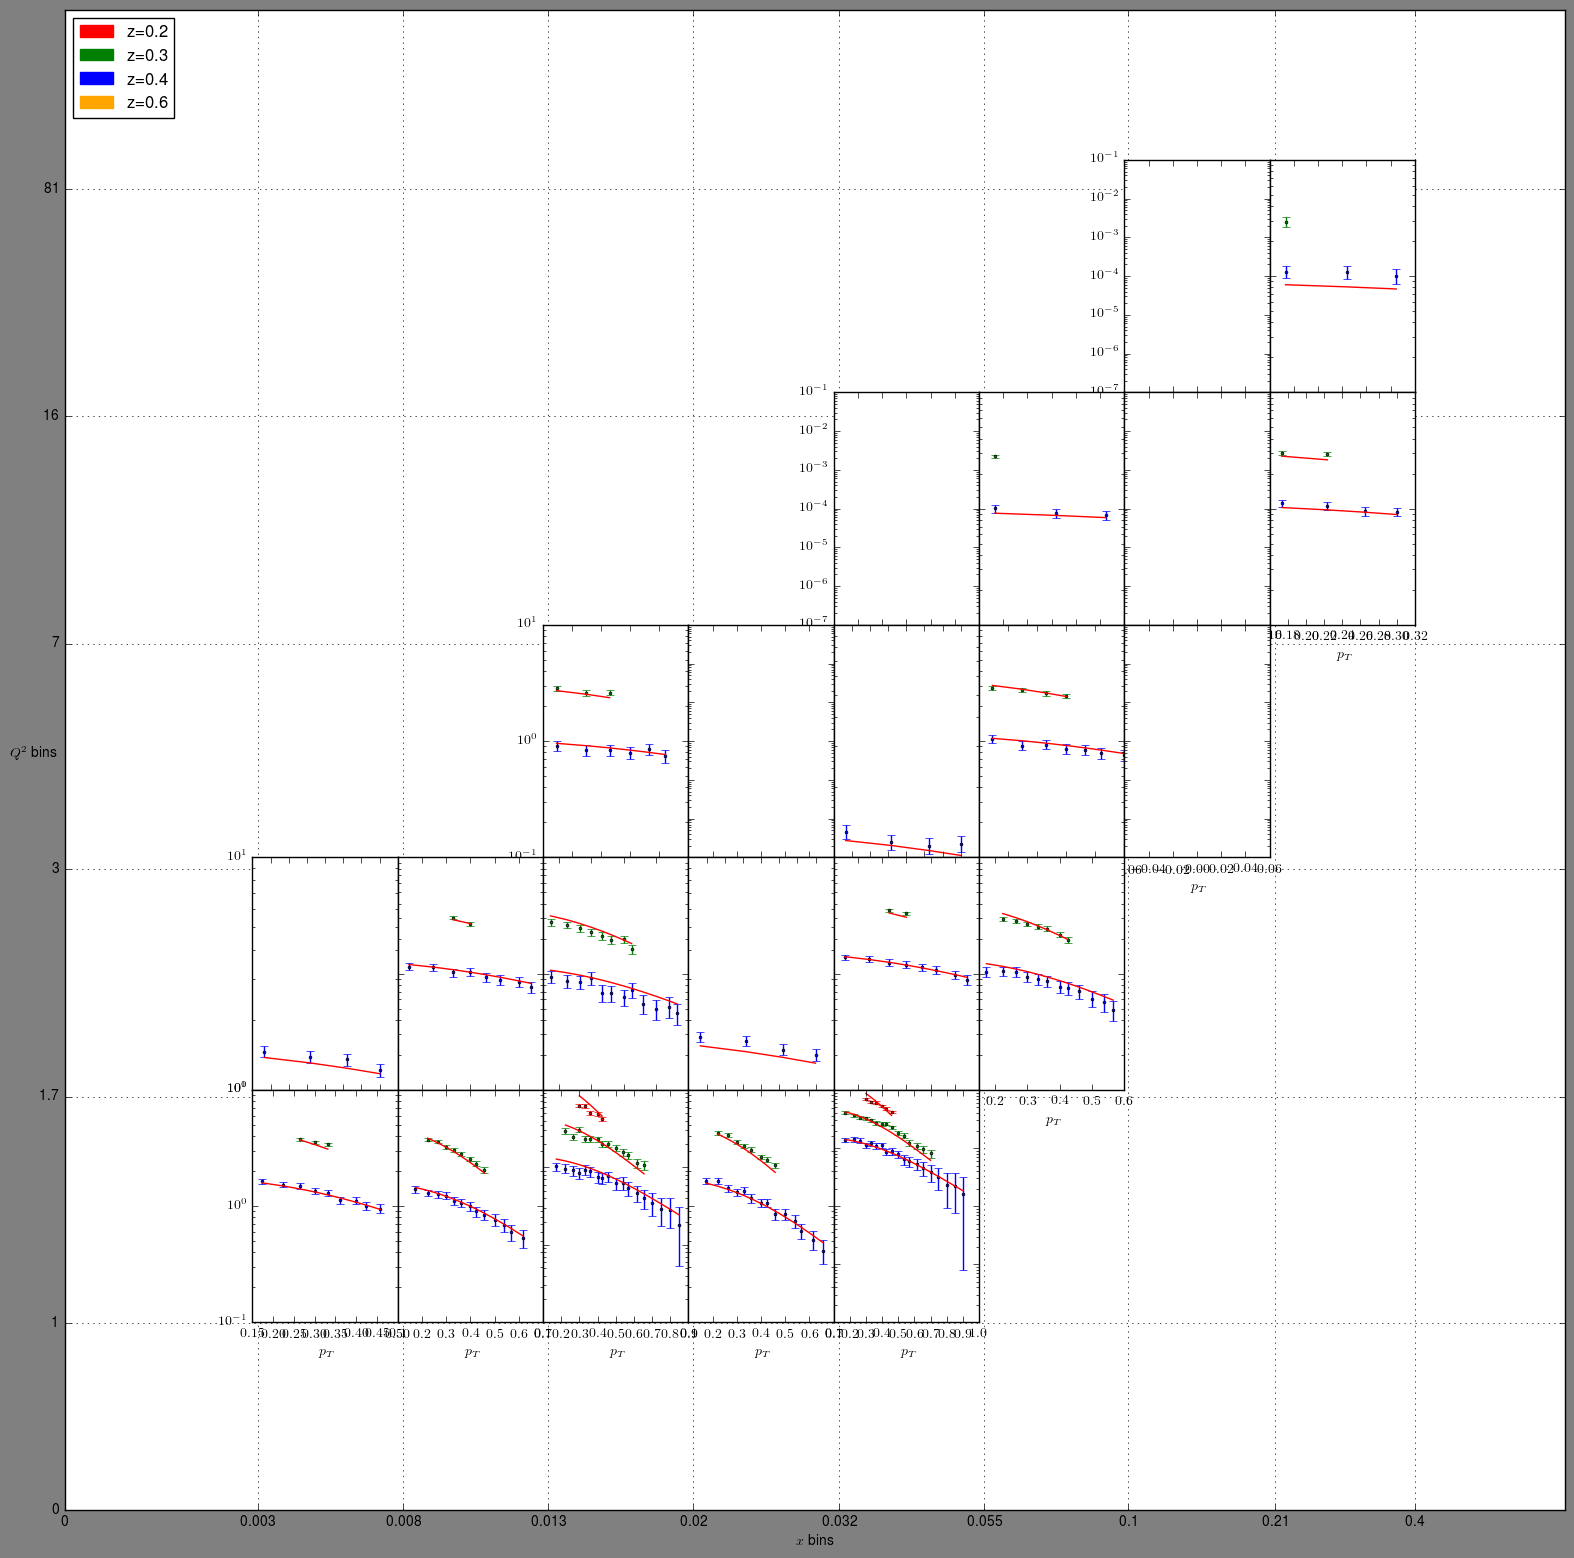

In [49]:
## Ploting
fig=plt.figure(figsize=(15, 15),facecolor="gray") # figsize=wxh in inches

globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) #the axis to put subplot grid in
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 8, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) #subplot grid

# Set custom ticks
ax=fig.add_axes([0,0,1,1])
ax.yaxis.set_ticks([ 0.,0.1245,0.2755,0.427,0.57752,0.729,0.8805])
ax.xaxis.set_ticks([0,0.1285,0.2255,0.322,0.419,0.516,0.613,0.709,0.71+0.097,0.9])
ax.set_yticklabels([0]+Q2Bin)
ax.set_xticklabels([0]+xBin)

# Set title and axis labels
#ax.title("COMPASS Data")
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
ax.set_xlabel(r"$x$ bins")

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='z=0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='z=0.3')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='z=0.4')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='z=0.6')
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4],loc='upper left')
ax.grid()

for group,grid in zip(range(len(groups)),gridmap):
    data_bin=data5001.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1]))
    data_bin_whole=data5001whole.query('xClas=="%s" and Q2Clas=="%s"' %(groups[group][0],groups[group][1]))
    k=0 #counter
    for i in z:
        ax = fig.add_subplot(innerGrid[grid])
        ax.set_yscale("log") 
        ax.errorbar(data_bin.pT[data_bin.z==i],data_bin.value[data_bin.z==i],#x,y
                    data_bin.delta[data_bin.z==i],#errorbars
                    color=Zcolor[k],marker=Zmark[k],linestyle="",linewidth=1,markersize=2)#whole data
        #ax.errorbar(data_bin_whole.pT[data_bin.z==i],data_bin_whole.value[data_bin.z==i],#x,y
        #            data_bin_whole.delta[data_bin.z==i],#errorbars
        #            color=Zcolor[k],marker=Zmark[k],linestyle=Zline[k],linewidth=0,markersize=2)#fitted data
        #print data_bin_theory
        ax.plot(data_bin.pT[data_bin.z==i],data_bin.thy[data_bin.z==i],'r-')
        if grid not in shairYax:
            ax.set_yticklabels('')
        if grid not in shairXax:
            ax.set_xticklabels('')
        k+=1 #add one to counter
        ax.set_xlabel(r"$p_T$")

